In [8]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error



In [9]:
# Load the dataset
df=pd.read_csv('/content/insurance_data.csv')

In [10]:
# Print first five rows using head() function
df.head()

,age,sex,bmi,children,region,charges
0,18,male,33.770,1,southeast,1725.55230
1,28,male,33.000,3,southeast,4449.46200
2,33,male,22.705,0,northwest,21984.47061
3,32,male,28.880,0,northwest,3866.85520
4,31,female,25.740,0,southeast,3756.62160


In [11]:
#Check if there are any null values. If any column has null values, treat them accordingly
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
region      0
charges     0
dtype: int64

In [12]:
df.shape

(1064, 6)

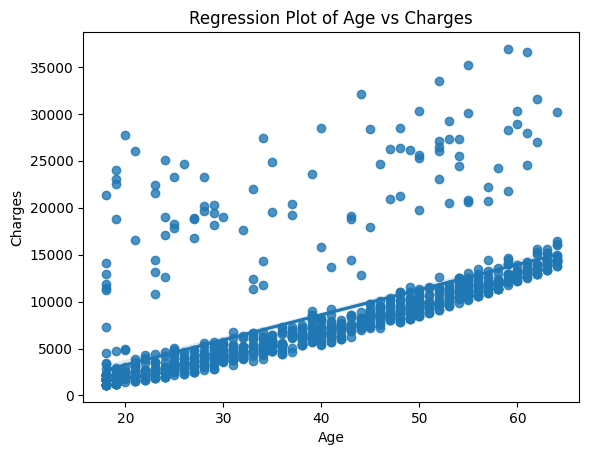

In [13]:
#Create a regression plot between 'age' and 'charges' using regplot in seaborn
snb.regplot(x=df['age'], y=df['charges'], data=df)
plt.title('Regression Plot of Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


In [15]:
# Split the DataFrame into the training and test sets. #separate features and target
x=df.iloc[:,0]
y=df.iloc[:,-1]

# Split the DataFrame into the training and test sets.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=3)
print(X_train.head())
y_train.head()


159     28
1057    57
938     38
97      61
93      26
Name: age, dtype: int64


159      4337.73520
1057    12629.16560
938      6457.84340
97      13616.35860
93       3385.39915
Name: charges, dtype: float64

In [16]:
#1. Create two-dimensional NumPy arrays for the feature and target variables.
X_train_array = X_train.values.reshape(-1, 1)
# Reshape to a 2D array (assuming X_train is a single feature)
y_train_array = y_train.values.reshape(-1, 1)

X_test_array =X_test.values.reshape(-1, 1)
y_test_array =y_test.values.reshape(-1, 1)


# Print the shape or dimensions of these arrays
print("Shape of X_train_array:", X_train_array.shape)
print("Shape of y_train_array:", y_train_array.shape)


Shape of X_train_array: (712, 1)
Shape of y_train_array: (712, 1)


In [19]:
# 2. Deploy linear regression model using the 'sklearn.linear_model' module. # Create an object of the 'LinearRegression' class.
# 3. Call the 'fit()' function
# Print the slope and intercept values
lr = LinearRegression()
lr.fit(X_train_array, y_train_array)

print("Intercept: ",lr.intercept_)
print("Slope : ", lr.coef_)


Intercept:  [-1647.04427538]
Slope :  [[256.97566979]]


In [20]:
# Predict the target variable values for both training set and test set #Testing set
ypred_test = lr.predict(X_test_array)

#Training set
ypred_train = lr.predict(X_train_array)

print("Predictions by model post build with training data: ",ypred_train)
print("Predictions by model post build with testing data: ",ypred_test)


Predictions by model post build with training data:  [[ 5548.27447877]
 [13000.5689027 ]
 [ 8118.03117668]
 [14028.47158186]
 [ 5034.32313919]
 [ 3749.44479023]
 [ 9916.86086521]
 [10687.78787458]
 [ 6833.15282772]
 [ 2978.51778086]
 [13514.52024228]
 [ 3492.46912044]
 [10944.76354437]
 [14285.44725166]
 [ 4006.42046002]
 [ 4263.39612981]
 [ 5291.29880898]
 [11715.69055375]
 [11201.73921417]
 [ 6576.17715793]
 [ 4263.39612981]
 [13000.5689027 ]
 [11201.73921417]
 [ 7861.05550688]
 [ 5034.32313919]
 [ 9659.88519542]
 [ 3235.49345065]
 [ 8888.95818605]
 [ 8888.95818605]
 [ 9916.86086521]
 [ 4520.3717996 ]
 [ 8118.03117668]
 [ 2978.51778086]
 [11972.66622354]
 [ 5548.27447877]
 [12743.59323291]
 [ 7090.12849751]
 [ 2978.51778086]
 [14285.44725166]
 [ 5548.27447877]
 [10430.81220479]
 [11201.73921417]
 [ 3749.44479023]
 [ 8375.00684647]
 [ 5034.32313919]
 [10173.836535  ]
 [13000.5689027 ]
 [ 4006.42046002]
 [ 4263.39612981]
 [ 5805.25014856]
 [10687.78787458]
 [ 4006.42046002]
 [ 8631.982

In [21]:
#print test Performance measure #Evaluate the model
mae = mean_absolute_error(y_test_array, ypred_test)
mse = mean_squared_error(y_test_array, ypred_test)
r2 = r2_score(y_test_array, ypred_test)
print("R2 score: ",r2)
print("Mean absolute error: ",mae)
print("Mean squared error: ",mse)


R2 score:  0.43888425840354306
Mean absolute error:  2582.406558628282
Mean squared error:  21063633.27125941


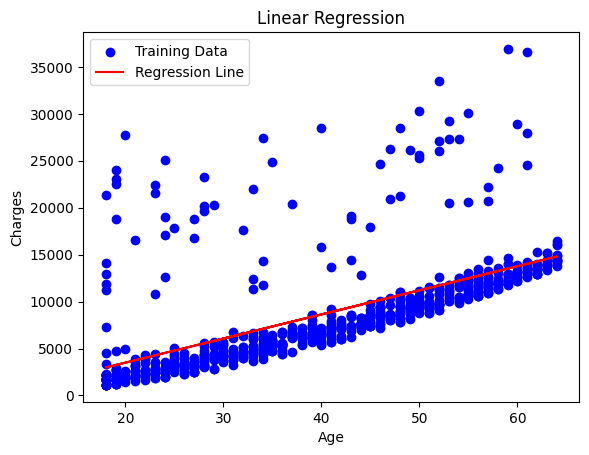

In [23]:
#Plot the regression line
# Plotting the scatter plot of the training data
plt.scatter(X_train_array, y_train_array, color='blue', label='Training Data')

# Plotting the regression line
plt.plot(X_train_array, ypred_train, color='red', label='Regression Line')

# Labeling axes and title
plt.title('Linear Regression')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()

# Show plot
plt.show()
